# Applying Solution to Full Streets Data



In [2]:
import networkx as nx
import geopandas as gpd
import momepy
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import osmnx as ox
import shapely

c:\Users\Sneez\Desktop\Snowplowing\Snowplow-Routing-Code\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Step 1: Read and pre-process data

In [3]:
# Read the shapefile
shapefile_path = 'C:/Users/Sneez/Desktop/Snowplowing/Data+Info/GIS Data/OSMWithData.gpkg'
street_gdf = gpd.read_file(shapefile_path)
street_gdf

,name,geom_Lengt,Jurisdicti,Shape__Len,LengthMile,Depth_in,With_EE_ft,AverageSpe,fullStreet,StreetSegm,...,PASER_Ra_3,CreationDa,PASER_Ra_4,Creator,PASER_Ra_5,EditDate,PASER_Ra_6,Editor,PASER_Ra_7,geometry
0,University Avenue,0.000117,State,1889.211956,0.357805,0.0,48.0,None,University Avenue,University Ave_01,...,-1.0,2022-04-27,-1.0,skiley_Middleton,-1.0,2024-01-05,-1.0,skiley_Middleton,0.0,"MULTILINESTRING ((-89.48609 43.08982, -89.4861..."
1,Allen Boulevard,0.000319,County,2004.510057,0.379642,5.5,54.0,None,Allen Boulevard,Allen Blvd_1,...,-1.0,2022-04-27,-1.0,skiley_Middleton,-1.0,2024-01-05,-1.0,skiley_Middleton,0.0,"MULTILINESTRING ((-89.48609 43.08982, -89.4860..."
2,Century Avenue,0.000082,County,383.443697,0.072622,0.0,0.0,None,Century Avenue,Century Ave_01,...,-1.0,2022-04-27,-1.0,skiley_Middleton,-1.0,2024-01-05,-1.0,skiley_Middleton,0.0,"MULTILINESTRING ((-89.49026 43.10412, -89.4901..."
3,Amherst Road,0.001708,City,878.128296,0.166312,4.0,36.0,None,Amherst Road,Amherst Rd_1,...,3.0,2022-04-27,3.0,skiley_Middleton,3.0,2024-01-05,10.0,skiley_Middleton,9.0,"MULTILINESTRING ((-89.49026 43.10412, -89.4902..."
4,Century Avenue,0.002431,County,383.443697,0.072622,0.0,0.0,None,Century Avenue,Century Ave_01,...,-1.0,2022-04-27,-1.0,skiley_Middleton,-1.0,2024-01-05,-1.0,skiley_Middleton,0.0,"MULTILINESTRING ((-89.49026 43.10412, -89.4905..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,Evergreen Road,0.008853,City,1095.668337,0.207513,5.0,32.0,None,Evergreen Road,Evergreen Rd_1,...,9.0,2022-04-27,7.0,skiley_Middleton,7.0,2024-01-05,7.0,skiley_Middleton,7.0,"MULTILINESTRING ((-89.54120 43.11113, -89.5412..."
1937,Airport Road,0.000841,City,894.248645,0.169365,4.0,52.0,None,Airport Road,Airport Rd_1,...,8.0,2022-04-27,8.0,skiley_Middleton,8.0,2024-01-05,8.0,skiley_Middleton,8.0,"MULTILINESTRING ((-89.54036 43.11115, -89.5412..."
1938,Airport Road,0.002381,City,894.248645,0.169365,4.0,52.0,None,Airport Road,Airport Rd_1,...,8.0,2022-04-27,8.0,skiley_Middleton,8.0,2024-01-05,8.0,skiley_Middleton,8.0,"MULTILINESTRING ((-89.54036 43.11115, -89.5401..."
1939,Pleasant View Road,0.000151,City,85.208730,0.016138,3.0,23.0,None,Pleasant View Road,Pleasant View Rd_1,...,5.0,2022-04-27,5.0,skiley_Middleton,7.0,2024-01-05,7.0,skiley_Middleton,7.0,"MULTILINESTRING ((-89.53792 43.11129, -89.5379..."


In [4]:
street_gdf['abvPostTyp'].unique()

array(['Ave', 'Blvd', 'Rd', None, 'Way', 'Ln', 'Dr', 'Trl', 'Plz', 'St',
       'Ct', 'Cir', 'Pl', 'Pass', 'Loop', 'Ter', 'Pkwy', 'Run', 'Walk',
       'Grn', 'Hl'], dtype=object)

In [21]:
street_gdf.columns

Index(['name', 'geom_Lengt', 'Jurisdicti', 'Shape__Len', 'LengthMile',
       'Depth_in', 'With_EE_ft', 'AverageSpe', 'fullStreet', 'StreetSegm',
       'FromName', 'ToName', 'Shape__Len_2', 'LengthMile_2', 'Depth_in_2',
       'With_EE_ft_2', 'ROW_ft', 'PASER_Rati', 'RdCode', 'Jurisdicti_2',
       'YearComple', 'ProjectNum', 'ProjectNam', 'SurfaceMat', 'AADT',
       'ADTMonthYe', 'AverageSpe_2', 'YearSpeedC', 'CG_Type_Ev', 'CG_Type_Od',
       'CG_Width_f', 'CG_Width_1', 'T_Width_ft', 'T_Width__1', 'Sidewalk_L',
       'Sidewalk_W', 'StreetSe_1', 'abvStreetN', 'abvPreDire', 'abvPreType',
       'abvPostTyp', 'abvPostDir', 'Maintained', 'TrafficDir', 'SpeedDir',
       'Class_MPO_', 'Culdesac_R', 'Type', 'BaseMateri', 'DeveloperN',
       'preType', 'BaseName', 'postType', 'postDirect', 'Circle_YN',
       'PASER_Ra_1', 'PASER_Ra_2', 'GlobalID', 'PASER_Ra_3', 'CreationDa',
       'PASER_Ra_4', 'Creator', 'PASER_Ra_5', 'EditDate', 'PASER_Ra_6',
       'Editor', 'PASER_Ra_7', 'geometry

Attributes I want: with_ee_ft, Juristicti, abvPreType, Maintained

<Axes: >

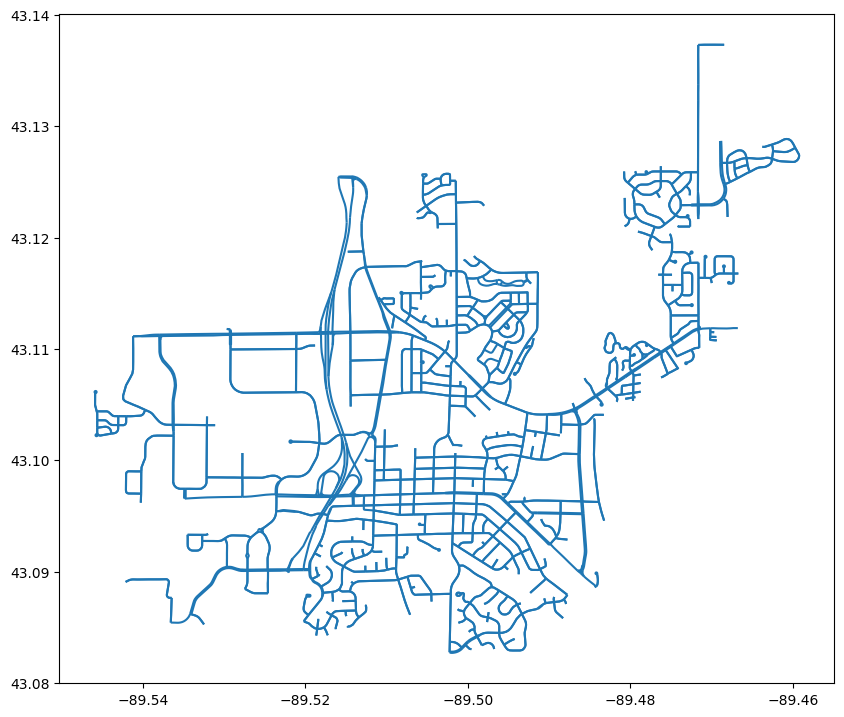

In [5]:
street_gdf.plot(figsize=(10,10))

Convert to networkx graph

In [13]:
G_primal = momepy.gdf_to_nx(street_gdf.explode(), approach='primal', directed=True)


C:\Users\Sneez\AppData\Local\Temp\ipykernel_20804\3200009096.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  G_primal = momepy.gdf_to_nx(street_gdf.explode(), approach='primal', directed=True)
c:\Users\Sneez\Desktop\Snowplowing\Snowplow-Routing-Code\.venv\Lib\site-packages\momepy\utils.py:252: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


## Get OSM Data for attributes like road type and travel time

In [14]:
G_osm = ox.graph_from_place('Middleton, Wisconsin', network_type='drive')
G_osm = ox.add_edge_speeds(G_osm)
G_osm = ox.add_edge_travel_times(G_osm)

In [56]:
nodes, edges = ox.graph_to_gdfs(G_osm) # better than momepy b/c fills in missing geometry attributes
print(edges["highway"].unique())
edges

['primary' 'secondary' 'residential' 'motorway_link' 'tertiary' 'motorway'
 'tertiary_link' 'secondary_link' 'unclassified' 'primary_link']


osmid  oneway lanes  \
u           v           key                                                    
30052861    454667326   0                            871134221    True     2   
            2573782092  0               [700703012, 871134222]    True     2   
30053475    3426163949  0                            178715043   False     4   
            53460137    0                              6654382   False   NaN   
            568267435   0                            178715043   False     4   
...                                                        ...     ...   ...   
11367791760 53712609    0    [712687115, 712669826, 712687114]   False   NaN   
11367791761 11367791760 0                             28616743   False   NaN   
            1881948104  0                              4719323    True   NaN   
11367791768 1881948104  0                             46847063    True   NaN   
            11367791761 0                            129265710    True   NaN   

                                ref                name      highway maxspeed  \
u           v           key                                                     
30052861    454667326   0    CTH MS   University Avenue      primary   35 mph   
            2573782092  0       NaN     Allen Boulevard    secondary      NaN   
30053475    3426163949  0     CTH M      Century Avenue    secondary   30 mph   
            53460137    0       NaN        Amherst Road  residential      NaN   
            568267435   0     CTH M      Century Avenue    secondary   30 mph   
...                             ...                 ...          ...      ...   
11367791760 53712609    0       NaN      Evergreen Road  residential      NaN   
11367791761 11367791760 0       NaN        Airport Road     tertiary      NaN   
            1881948104  0       NaN        Airport Road     tertiary      NaN   
11367791768 1881948104  0       NaN  Pleasant View Road     tertiary      NaN   
            11367791761 0       NaN        Airport Road     tertiary      NaN   

                            reversed   length  speed_kph  travel_time  \
u           v           key                                             
30052861    454667326   0      False   10.805       56.3          0.7   
            2573782092  0      False   32.204       52.6          2.2   
30053475    3426163949  0      False    6.678       48.3          0.5   
            53460137    0       True  189.262       42.4         16.1   
            568267435   0       True  198.241       48.3         14.8   
...                              ...      ...        ...          ...   
11367791760 53712609    0       True  893.599       42.4         75.9   
11367791761 11367791760 0      False   68.248       43.2          5.7   
            1881948104  0      False  193.357       43.2         16.1   
11367791768 1881948104  0      False   15.998       43.2          1.3   
            11367791761 0      False  199.416       43.2         16.6   

                                                                      geometry  \
u           v           key                                                      
30052861    454667326   0    LINESTRING (-89.48609 43.08982, -89.48619 43.0...   
            2573782092  0    LINESTRING (-89.48609 43.08982, -89.48604 43.0...   
30053475    3426163949  0    LINESTRING (-89.49026 43.10412, -89.49018 43.1...   
            53460137    0    LINESTRING (-89.49026 43.10412, -89.49026 43.1...   
            568267435   0    LINESTRING (-89.49026 43.10412, -89.49056 43.1...   
...                                                                        ...   
11367791760 53712609    0    LINESTRING (-89.54120 43.11113, -89.54120 43.1...   
11367791761 11367791760 0    LINESTRING (-89.54036 43.11115, -89.54120 43.1...   
            1881948104  0    LINESTRING (-89.54036 43.11115, -89.54012 43.1...   
11367791768 1881948104  0    LINESTRING (-89.53792 43.11129, -89.53798 43.1...   
            11367791761 0   

Need to update passes, salt, and priority based on guidance from Eric

In [74]:
priority_keys = {"motorway_link":1, "tertiary_link":1, "secondary_link":1, "primary_link":1, "unclassified":1, "residential":2, "tertiary":3, "secondary":4, "primary":5, "motorway":6}
passes_keys = {"motorway_link":1, "tertiary_link":1, "secondary_link":1, "primary_link":1, "unclassified":1, "residential":2, "tertiary":3, "secondary":4, "primary":5, "motorway":6}
salt_keys = {"motorway_link":1, "tertiary_link":1, "secondary_link":1, "primary_link":1, "unclassified":1, "residential":2, "tertiary":3, "secondary":4, "primary":5, "motorway":6}

priorities = np.empty(len(edges))
passes = np.empty(len(edges))
salt = np.empty(len(edges))

# go through each edge and update dictionary
for row in range(len(edges)):
    highway_type = edges.iloc[row]['highway']
    priorities[row] = priority_keys[highway_type]
    passes[row] = passes_keys[highway_type]
    salt[row] = passes_keys[highway_type]

edges['priority'] = priorities
edges['passes_rem'] = passes
edges['salt_per'] = salt


Add in attributes from geodataframe

In [75]:
edges['jurisdiction'] = np.array(street_gdf['Jurisdicti'])
edges['width'] = np.array(street_gdf['With_EE_ft'])
edges['roadtype'] = np.array(street_gdf['abvPostTyp'])
edges['maintainer'] = np.array(street_gdf['Maintained'])
edges['deadheading_passes'] = np.zeros(len(edges))

edges

osmid  oneway lanes  \
u           v           key                                                    
30052861    454667326   0                            871134221    True     2   
            2573782092  0               [700703012, 871134222]    True     2   
30053475    3426163949  0                            178715043   False     4   
            53460137    0                              6654382   False   NaN   
            568267435   0                            178715043   False     4   
...                                                        ...     ...   ...   
11367791760 53712609    0    [712687115, 712669826, 712687114]   False   NaN   
11367791761 11367791760 0                             28616743   False   NaN   
            1881948104  0                              4719323    True   NaN   
11367791768 1881948104  0                             46847063    True   NaN   
            11367791761 0                            129265710    True   NaN   

                                ref                name      highway maxspeed  \
u           v           key                                                     
30052861    454667326   0    CTH MS   University Avenue      primary   35 mph   
            2573782092  0       NaN     Allen Boulevard    secondary      NaN   
30053475    3426163949  0     CTH M      Century Avenue    secondary   30 mph   
            53460137    0       NaN        Amherst Road  residential      NaN   
            568267435   0     CTH M      Century Avenue    secondary   30 mph   
...                             ...                 ...          ...      ...   
11367791760 53712609    0       NaN      Evergreen Road  residential      NaN   
11367791761 11367791760 0       NaN        Airport Road     tertiary      NaN   
            1881948104  0       NaN        Airport Road     tertiary      NaN   
11367791768 1881948104  0       NaN  Pleasant View Road     tertiary      NaN   
            11367791761 0       NaN        Airport Road     tertiary      NaN   

                            reversed   length  speed_kph  ...  junction  \
u           v           key                               ...             
30052861    454667326   0      False   10.805       56.3  ...       NaN   
            2573782092  0      False   32.204       52.6  ...       NaN   
30053475    3426163949  0      False    6.678       48.3  ...       NaN   
            53460137    0       True  189.262       42.4  ...       NaN   
            568267435   0       True  198.241       48.3  ...       NaN   
...                              ...      ...        ...  ...       ...   
11367791760 53712609    0       True  893.599       42.4  ...       NaN   
11367791761 11367791760 0      False   68.248       43.2  ...       NaN   
            1881948104  0      False  193.357       43.2  ...       NaN   
11367791768 1881948104  0      False   15.998       43.2  ...       NaN   
            11367791761 0      False  199.416       43.2  ...       NaN   

                            access jurisdiction width roadtype  \
u           v           key                                      
30052861    454667326   0      NaN        State  48.0      Ave   
            2573782092  0      NaN       County  54.0     Blvd   
30053475    3426163949  0      NaN       County   0.0      Ave   
            53460137    0      NaN         City  36.0       Rd   
            568267435   0      NaN       County   0.0      Ave   
...                            ...          ...   ...      ...   
11367791760 53712609    0      NaN         City  32.0       Rd   
11367791761 11367791760 0      NaN         City  52.0       Rd   
            1881948104  0      NaN         City  52.0       Rd   
11367791768 1881948104  0      NaN         City  23.0       Rd   
            11367791761 0      NaN         City  52.0       Rd   

                                     maintainer  deadheading_passes priority  \
u           v           key                    

In [76]:
G = ox.graph_from_gdfs(nodes, edges)

print(G)

MultiDiGraph with 813 nodes and 1941 edges


Convert to a strongly connected graph

In [77]:
G_strong = G.copy()
scc = list(nx.strongly_connected_components(G)) # strongly connected components
scc.remove(max(scc, key=len))

for i in scc:
    for j in i:
        G_strong.remove_node(j) # remove all but the strongest connected component from G
print(nx.is_strongly_connected(G_strong))

True


Plot

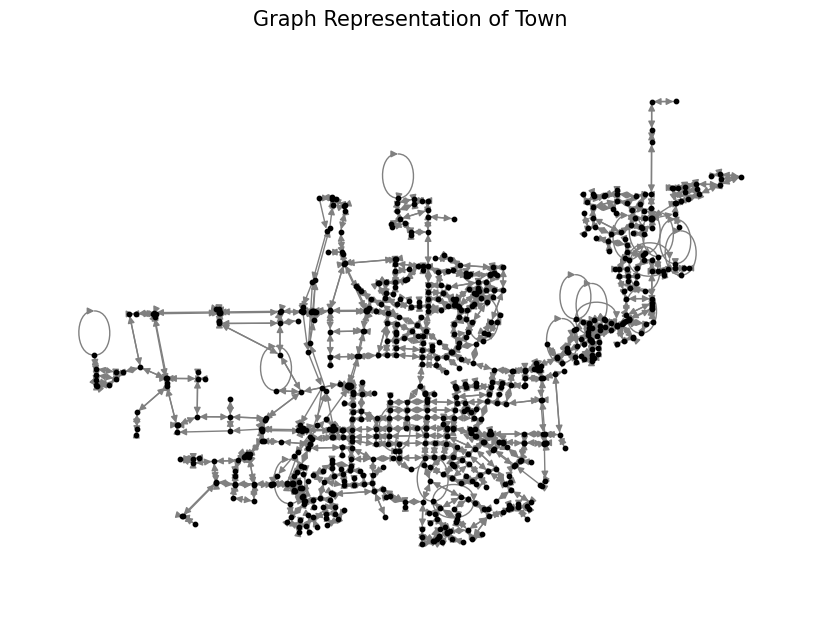

In [78]:
node_positions = {node[0]: (node[1]['x'], node[1]['y']) for node in G_strong.nodes(data=True)}
plt.figure(figsize=(8, 6))
nx.draw(G_strong, pos=node_positions, node_size=10, node_color='black', edge_color='gray', with_labels=False)
plt.title('Graph Representation of Town', size=15)
plt.show()

Add weighted degree and deadheading passes

In [79]:
def config_graph_node_attributes(G):
    for node in G.nodes:
        weight_deg = 0
        for edge in G.edges([node], data=True):
            weight_deg += edge[2]['passes_rem']*edge[2]['priority']
        G.nodes[node]['weighted_degree'] = weight_deg


config_graph_node_attributes(G_strong)
# print result
for node in G_strong.nodes(data=True):
    print(node)

(454667326, {'y': 43.0898862, 'x': -89.486188, 'highway': 'traffic_signals', 'street_count': 4, 'weighted_degree': 25.0})
(30053475, {'y': 43.1041156, 'x': -89.4902579, 'street_count': 3, 'weighted_degree': 36.0})
(3426163949, {'y': 43.1041179, 'x': -89.4901757, 'street_count': 3, 'weighted_degree': 32.0})
(53460137, {'y': 43.1024203, 'x': -89.4904035, 'street_count': 4, 'weighted_degree': 16.0})
(568267435, {'y': 43.1042716, 'x': -89.4926768, 'highway': 'traffic_signals', 'street_count': 3, 'weighted_degree': 41.0})
(38408843, {'y': 43.0967641, 'x': -89.5140532, 'highway': 'traffic_signals', 'street_count': 4, 'weighted_degree': 26.0})
(441028477, {'y': 43.096888, 'x': -89.5140567, 'highway': 'traffic_signals', 'street_count': 4, 'weighted_degree': 26.0})
(53475938, {'y': 43.0968342, 'x': -89.5128708, 'street_count': 3, 'weighted_degree': 50.0})
(38408844, {'y': 43.0968493, 'x': -89.5177331, 'street_count': 3, 'weighted_degree': 26.0})
(441028475, {'y': 43.0968466, 'x': -89.5181202, '

In [87]:
def print_graph_attributes(G, nodes=True, edges=True):
    if nodes:
        for node in G.nodes(data=True):
            print(node)
    if edges:
        for edge in G.edges(data=True, keys=True):
            print(edge)

## Creating the Dual Graph
#### Determining the Angle Between Two Linestrings

Determining the angle between two linestrings. There are two approaches: endpoints vs. closest coords. Closest coords is the best approach, but momepy uses endpoints

In [80]:
from math import atan2
from math import pi

def angle(a, b, c):
    '''
    Calculates the signed angle in degrees between vectors ab and bc. Negative if bc is clockwise of ab.
    '''
    v = (b[0]-a[0], b[1]-a[1])
    w = (c[0]-b[0], c[1]-b[1])

    dot = v[0]*w[0] + v[1]*w[1]     # Dot product between [x1, y1] and [x2, y2]
    det = v[0]*w[1] - v[1]*w[0]      # Determinant
    angle = atan2(det, dot)  # atan2(y, x) or atan2(sin, cos)

    return angle*180/pi

In [81]:
def turn_direction(angle):
    '''
    Returns the direction of a turn given an angle. Clockwise (right turn) angles are negative, counterclockwise are positive
    '''
    if angle < 15 and angle > -15:
        return "straight"
    elif angle >= -90 and angle <= -15:
        return "right"
    elif angle >= -135 and angle < -90:
        return "sharp right"
    elif angle <= 90 and angle >= 15:
        return "left"
    elif angle <= 135 and angle > 90:
        return "sharp left"
    else:
        return "u-turn"

Note that plotting scales are disconfigured

-88.5576471686895
right


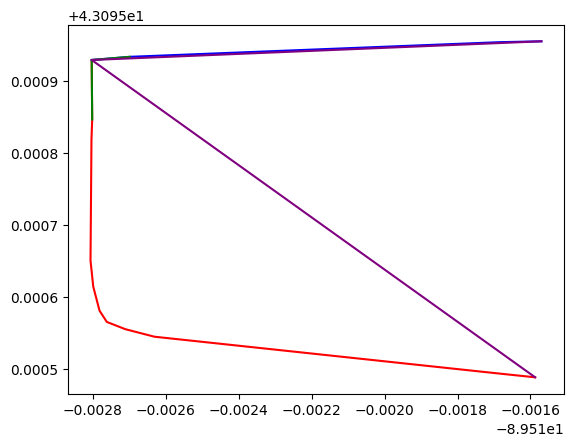

In [82]:
from_node = (53413399, 53441514)
to_node = (53441514, 53441511)
# get the edge associated with the two indices in from_node
testL1 = G.edges[from_node[0], from_node[1], 0]['geometry']
testL2 = G.edges[to_node[0], to_node[1], 0]['geometry']

p0 = testL1.coords[-2]
p1 = testL1.coords[-1]

p2 = testL2.coords[0]
p3 = testL2.coords[1]

p0_endpoint = testL1.coords[0]
p3_endpoint = testL2.coords[-1]

plt.plot(*testL1.xy, color='red')
plt.plot(*testL2.xy, color='blue')
plt.plot(*shapely.geometry.LineString([p0, p1, p2, p3]).xy, color='green') # green is much better
plt.plot(*shapely.geometry.LineString([p0_endpoint, p1, p2, p3_endpoint]).xy, color='purple')

points = [p0, p1, p2, p3]

shared = [x for x in points if points.count(x) > 1]
remaining = [e for e in points if e not in [shared[0]]]
angle_value = angle(remaining[0], shared[0], remaining[1])
print(angle_value)
print(turn_direction(angle_value))

As we can see, the green is a lot better approximation of the angle.

Furthermore, this method allows us to compute angles between self-loops, whereas Momepy fails here. However, this next example is really a u-turn in a cul-de-sac. Therefore, for self-loops, we set the angle to 180 degrees by hand

{0: {'osmid': 6763942, 'oneway': False, 'name': 'Henry Court', 'highway': 'residential', 'reversed': False, 'length': 46.884, 'speed_kph': 42.4, 'travel_time': 4.0, 'geometry': <LINESTRING (-89.505 43.094, -89.506 43.094, -89.506 43.094)>, 'jurisdiction': 'City', 'width': 28.0, 'roadtype': 'Ct', 'maintainer': 'CITY OF MIDDLETON', 'deadheading_passes': 0.0, 'priority': 2.0, 'passes_rem': 2.0, 'salt_per': 2.0}}
{0: {'osmid': 405907623, 'oneway': True, 'name': 'Henry Court', 'highway': 'residential', 'reversed': False, 'length': 48.30500000000001, 'speed_kph': 42.4, 'travel_time': 4.1, 'geometry': <LINESTRING (-89.506 43.094, -89.506 43.094, -89.506 43.094, -89.506 43.094,...>, 'jurisdiction': 'City', 'width': 28.0, 'roadtype': 'Ct', 'maintainer': 'CITY OF MIDDLETON', 'deadheading_passes': 0.0, 'priority': 2.0, 'passes_rem': 2.0, 'salt_per': 2.0}}
(43.094183, -89.5057213) 
 (43.0942089, -89.5058599) 
 (43.0942344, -89.5058469)
array('d', [-89.505287, -89.5057213, -89.5058599]) array('d', 

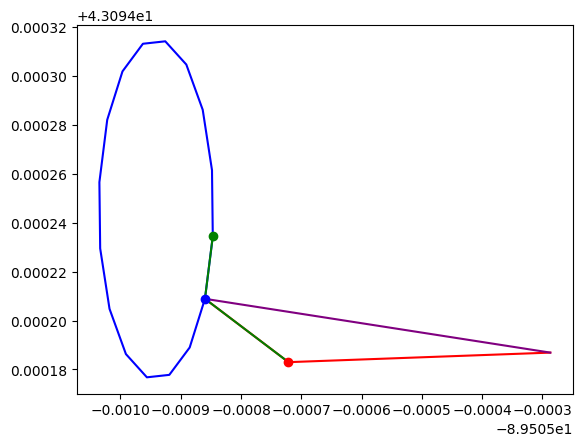

In [83]:
from_node = (53664849, 53664854)
to_node = (53664854, 53664854)
print(G[from_node[0]][from_node[1]]) #henry crt to henry st
print(G[to_node[0]][to_node[1]]) # henry ctr to henry crt (self loop) should be u-turns

# get the edge associated with the two indices in from_node
testL1 = G.edges[from_node[0], from_node[1], 0]['geometry']
testL2 = G.edges[to_node[0], to_node[1], 0]['geometry']

p0 = testL1.coords[-2]
p1 = testL1.coords[-1]

p2 = testL2.coords[0]
p3 = testL2.coords[1]

print(p0[::-1], "\n", p1[::-1], "\n", p3[::-1])
p0_endpoint = testL1.coords[0]
p3_endpoint = testL2.coords[-1]
print(*testL1.xy)
plt.plot(*testL1.xy, color='red')
plt.plot(*testL2.xy, color='blue')
plt.plot(*shapely.geometry.LineString([p0, p1, p2, p3]).xy, color='green') # green is much better
plt.plot(*shapely.geometry.LineString([p0_endpoint, p1, p2, p3_endpoint]).xy, color='purple')

points = [p0, p1, p2, p3]

shared = [x for x in points if points.count(x) > 1]
remaining = [e for e in points if e not in [shared[0]]]
plt.plot(*remaining[0], 'ro')
plt.plot(*shared[0], 'bo')
plt.plot(*remaining[1], 'go')
print(remaining[0], shared[0], remaining[1])
angle_value = angle(remaining[0], shared[0], remaining[1])
print(angle_value)
print(turn_direction(angle_value))

The graph is distorted from reality, but the turn is in actuality sharp right.

In [84]:
def cost_of_dual_node(n1, n2, angle):
    """
    Calculate the weighted degree of a node in a graph. Helper for ``create_dual``.
    """
    weight = n1[3]['travel_time'] + n2[3]['travel_time']
    # add the turn penalty cost
    turn_penalty = {"straight": 0, "right": 1, "left": 2, "sharp right": 2, "sharp left": 3, "u-turn": 4}
    
    weight += turn_penalty[turn_direction(angle)]
    return weight

In [85]:
def create_dual(G: nx.MultiDiGraph):
    L = nx.MultiDiGraph()

    # Create a graph specific edge function.
    for from_node in G.edges(keys=True, data=True):
        # from_node is: (u,v,key, attrb)
        L.add_node(from_node[:3])
        for to_node in G.edges(from_node[1], keys=True, data=True):
            L.add_edge(from_node[:3], to_node[:3])
            # self loop means a u-turn is needed
            if(to_node[0] == to_node[1]):
                L.edges[from_node[:3], to_node[:3], 0]['angle'] = 180
                continue
                
            # add angles
            testL1 = from_node[3]['geometry']
            testL2 = to_node[3]['geometry']

            p0 = testL1.coords[-2]
            p1 = testL1.coords[-1]
            p2 = testL2.coords[0]
            p3 = testL2.coords[1]

            
            points = [p0, p1, p2, p3]
            shared = [x for x in points if points.count(x) > 1]
            remaining = [e for e in points if e not in [shared[0]]]
            angle_value = angle(remaining[0], shared[0], remaining[1])

            L.edges[from_node[:3], to_node[:3], 0]['weight'] = cost_of_dual_node(from_node, to_node, angle_value)

    # add source and target nodes
    for node in G:
        L.add_node(str(node) + "_source", weight=0)
    # add edges connecting source and targets to valid gateways
    for node in L.nodes():
        # skip the source nodes which are strings. The other nodes are tuples
        if (type(node) == str):
            continue
            
        # for a digraph, not a multigraph:
        # source -> first node
        # second node -> source
        L.add_edge(str(node[0]) + "_source", node, weight=0)
        # L.add_edge(str(node[1]) + "_source", node, weight=0) only for undirected

        # L.add_edge(node, str(node[0]) + "_source", weight=0) only for undirected
        L.add_edge(node, str(node[1]) + "_source", weight=0)

    return L

In [88]:
G_dual = create_dual(G_strong)
print(G_dual)
print_graph_attributes(G_dual, nodes=False)

"""
Testing
node1 = 38408843
node2 = 441028477
node3 = 53303114
node4 = 452225415

nx.dijkstra_path(G_dual, (node1, node2, 0), (node3, node4, 0))"""

MultiDiGraph with 2700 nodes and 9060 edges
((454667326, 471251970, 0), (471251970, 471252019, 0), 0, {'weight': 26.599999999999998})
((454667326, 471251970, 0), '471251970_source', 0, {'weight': 0})
((471251970, 471252019, 0), (471252019, 53624762, 0), 0, {'weight': 33.2})
((471251970, 471252019, 0), (471252019, 471252040, 0), 0, {'weight': 27.7})
((471251970, 471252019, 0), (471252019, 471252022, 0), 0, {'weight': 46.3})
((471251970, 471252019, 0), '471252019_source', 0, {'weight': 0})
((30053475, 3426163949, 0), (3426163949, 30053475, 0), 0, {'weight': 5.0})
((30053475, 3426163949, 0), (3426163949, 568267438, 0), 0, {'weight': 11.7})
((30053475, 3426163949, 0), '3426163949_source', 0, {'weight': 0})
((3426163949, 30053475, 0), (30053475, 3426163949, 0), 0, {'weight': 5.0})
((3426163949, 30053475, 0), (30053475, 53460137, 0), 0, {'weight': 18.6})
((3426163949, 30053475, 0), (30053475, 568267435, 0), 0, {'weight': 15.3})
((3426163949, 30053475, 0), '30053475_source', 0, {'weight': 0})

'\nTesting\nnode1 = 38408843\nnode2 = 441028477\nnode3 = 53303114\nnode4 = 452225415\n\nnx.dijkstra_path(G_dual, (node1, node2, 0), (node3, node4, 0))'

# Step 4: Route Construction Algorithm (RCA)

Variables:
| Variable | Definition 
|:--------:|:--------:|
|  RCL |  Restricted Candidate List |
|  $\alpha$   |  Threshold parameter. Value between 0 and 1  
|  C<sub>min   | Lowest incremental cost of a candidate element to be added to the partial solution    |
| C<sub>max | Highest incremental cost of a candidate element to be added to the partial solution|
| S_i | Amount of salt required to service road i |
|E| List of possible candidates that can be added to the partial solution
|No_Routes|Number of routes developed in the network

